
It appears there's an issue with directly saving the Jupyter notebook content. I'll provide the notebook content as a code snippet that you can copy and paste into a new Jupyter notebook file.

Metagenomic Tools Benchmarking Analysis
This notebook contains the code to generate various plots for benchmarking metagenomic tools using the provided dataset.

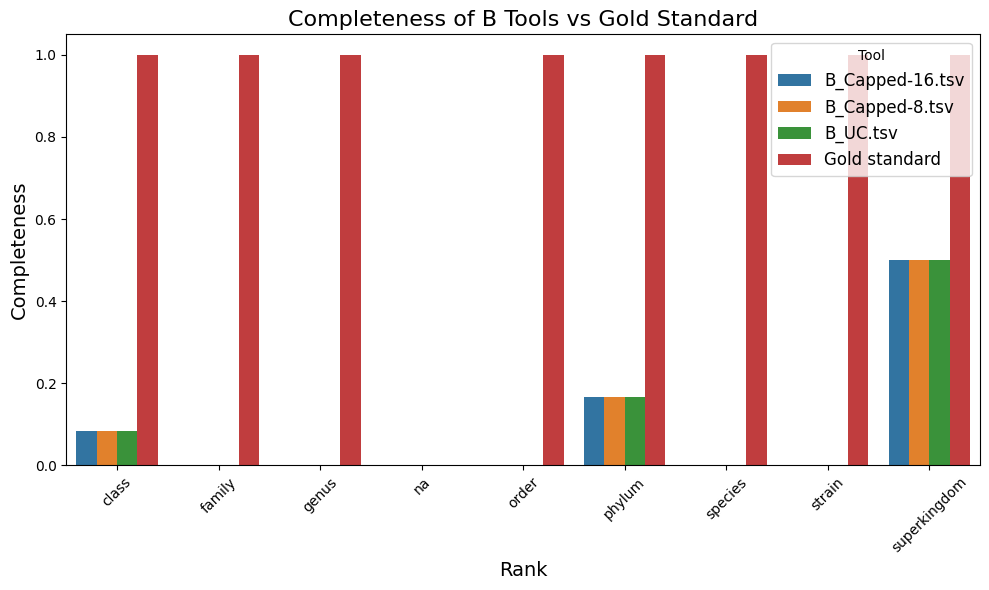

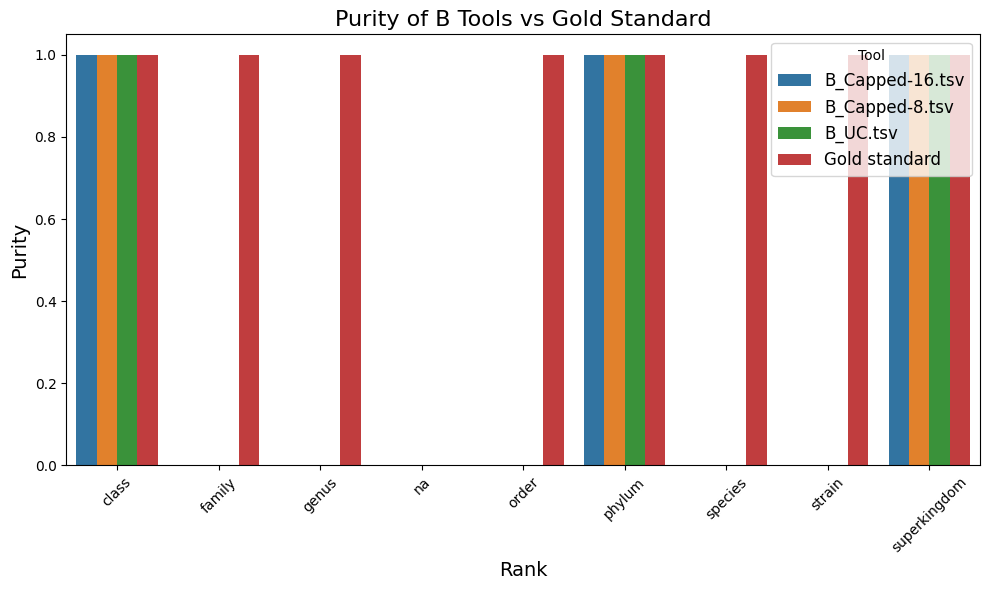

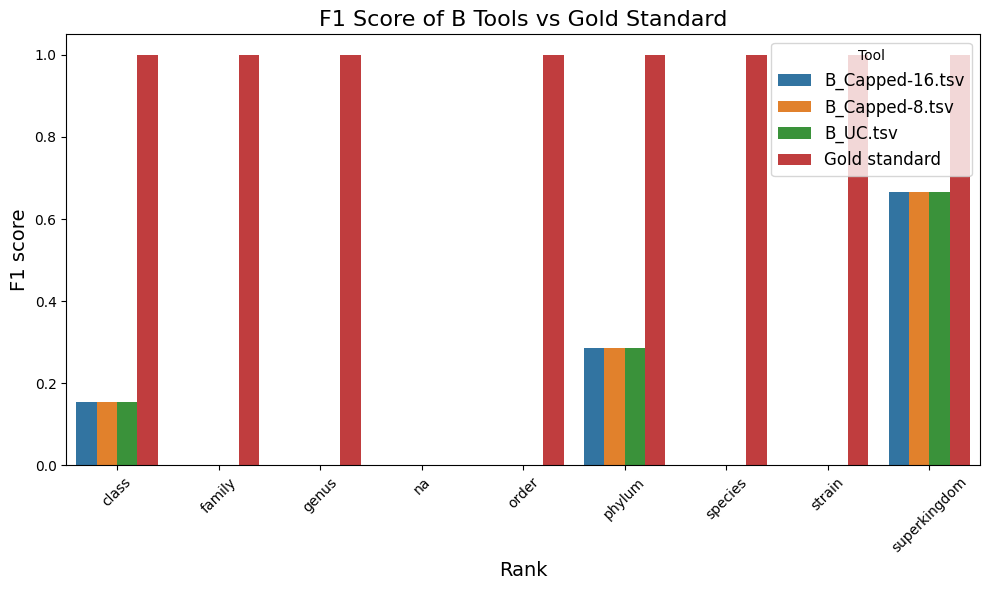

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the TSV data
file_path = 'results/s_results.tsv'
data = pd.read_csv(file_path, sep='\t')

# Data preprocessing: Include rows with 'NA' values in 'value' column
data_pivot = data.pivot_table(values='value', index=['tool', 'rank'], columns='metric', aggfunc='first').reset_index()

# Filter data for specific comparisons
data_b_comparison = data_pivot[data_pivot['tool'].isin(['B_UC.tsv', 'B_Capped-8.tsv', 'B_Capped-16.tsv', 'Gold standard'])]
data_k_comparison = data_pivot[data_pivot['tool'].isin(['K_UC.tsv', 'K_Capped-8.tsv', 'K_Capped-16.tsv', 'Gold standard'])]
data_m_comparison = data_pivot[data_pivot['tool'].isin(['M_UC.tsv', 'Gold standard'])]

# Function to create enhanced vertical bar plots for a given metric
def plot_enhanced_vertical_bar(data, metric, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='rank', y=metric, hue='tool', data=data, dodge=True)
    plt.title(title, fontsize=16)
    plt.xlabel('Rank', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Tool', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plotting for B comparison
plot_enhanced_vertical_bar(data_b_comparison, 'Completeness', 'Completeness of B Tools vs Gold Standard')
plot_enhanced_vertical_bar(data_b_comparison, 'Purity', 'Purity of B Tools vs Gold Standard')
plot_enhanced_vertical_bar(data_b_comparison, 'F1 score', 'F1 Score of B Tools vs Gold Standard')

# Plotting for K comparison
plot_enhanced_vertical_bar(data_k_comparison, 'Completeness', 'Completeness of K Tools vs Gold Standard')
plot_enhanced_vertical_bar(data_k_comparison, 'Purity', 'Purity of K Tools vs Gold Standard')
plot_enhanced_vertical_bar(data_k_comparison, 'F1 score', 'F1 Score of K Tools vs Gold Standard')

# Plotting for M comparison
plot_enhanced_vertical_bar(data_m_comparison, 'Completeness', 'Completeness of M Tools vs Gold Standard')
plot_enhanced_vertical_bar(data_m_comparison, 'Purity', 'Purity of M Tools vs Gold Standard')
plot_enhanced_vertical_bar(data_m_comparison, 'F1 score', 'F1 Score of M Tools vs Gold Standard')

# Save plots as images if needed
def save_enhanced_vertical_plot(data, metric, title, filename):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='rank', y=metric, hue='tool', data=data, dodge=True)
    plt.title(title, fontsize=16)
    plt.xlabel('Rank', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Tool', fontsize=12)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Example of saving a plot
save_enhanced_vertical_plot(data_b_comparison, 'Completeness', 'Completeness of B Tools vs Gold Standard', 'enhanced_b_completeness_plot.png')


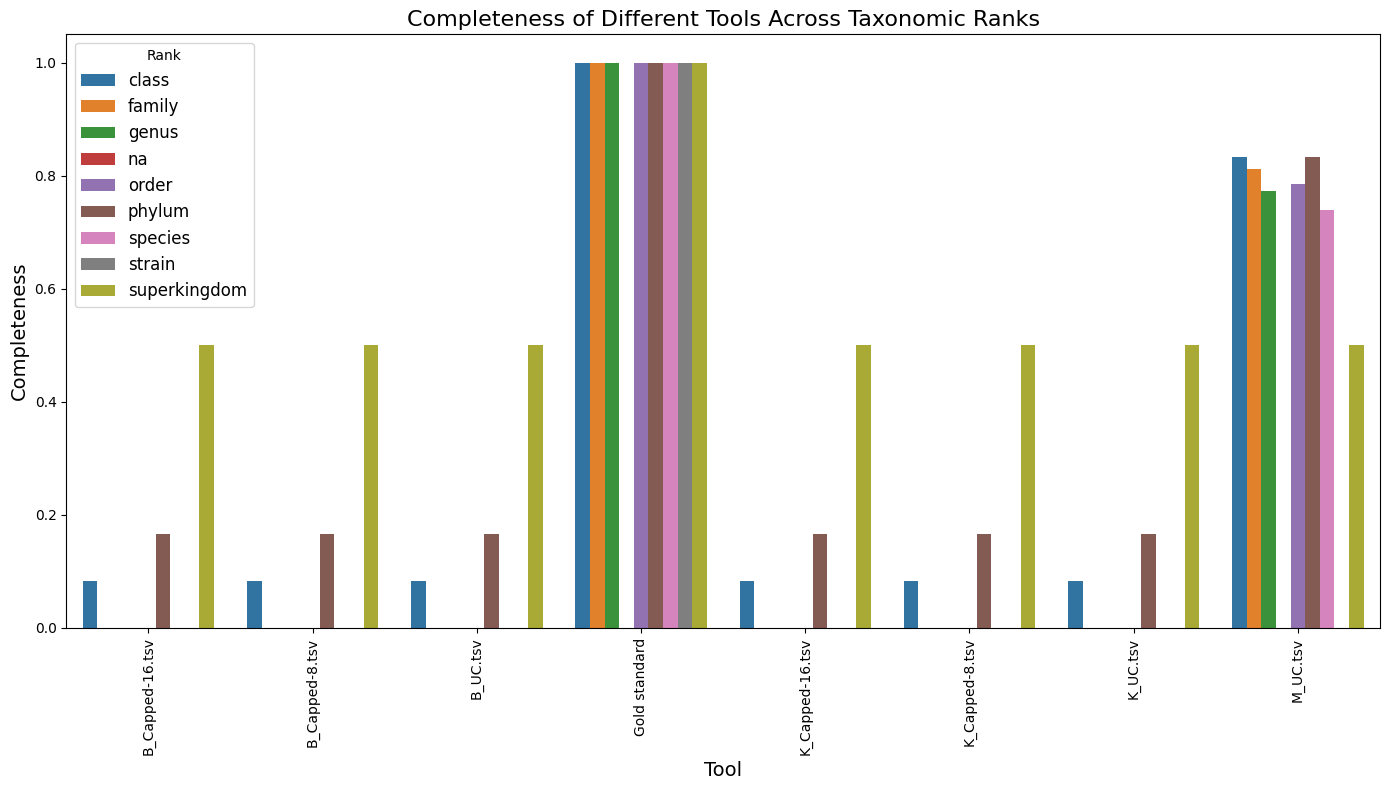

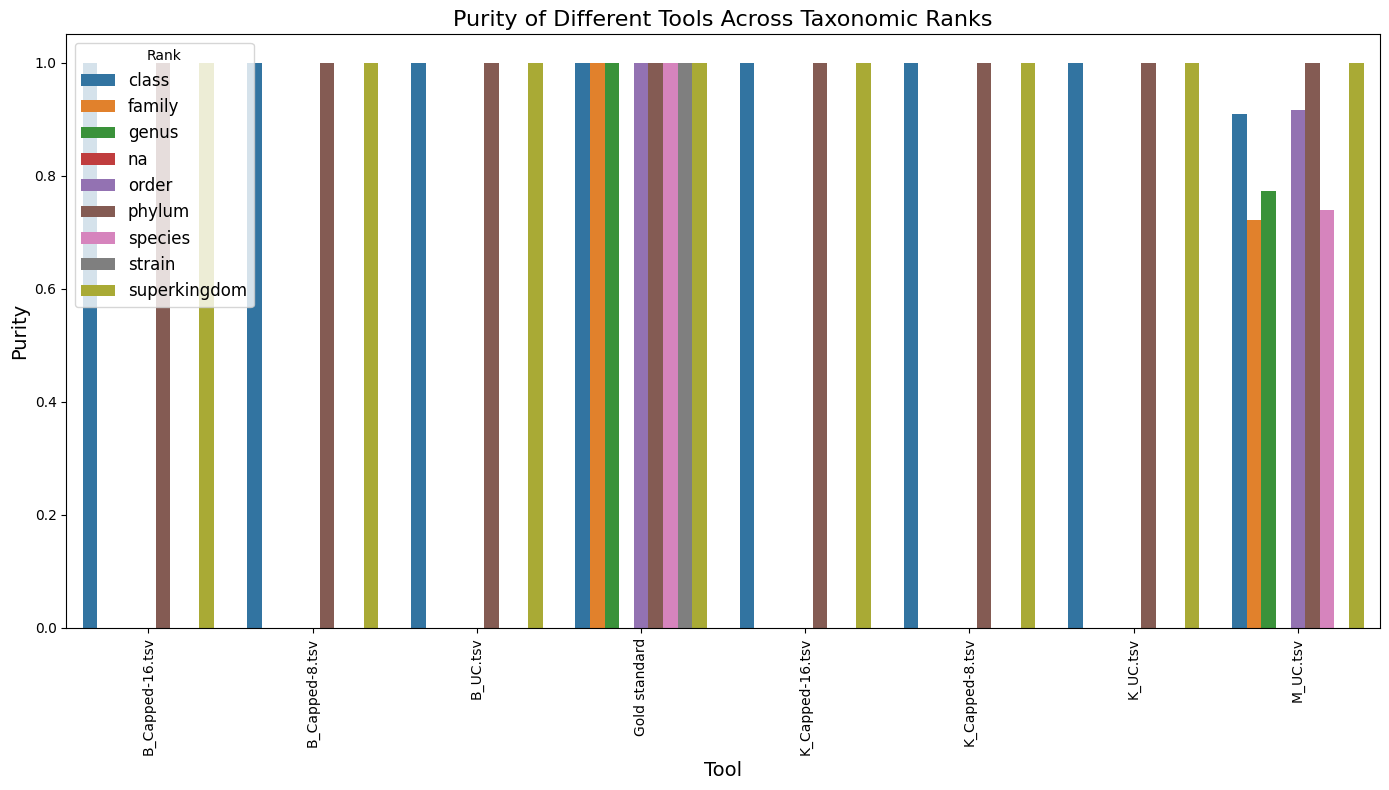

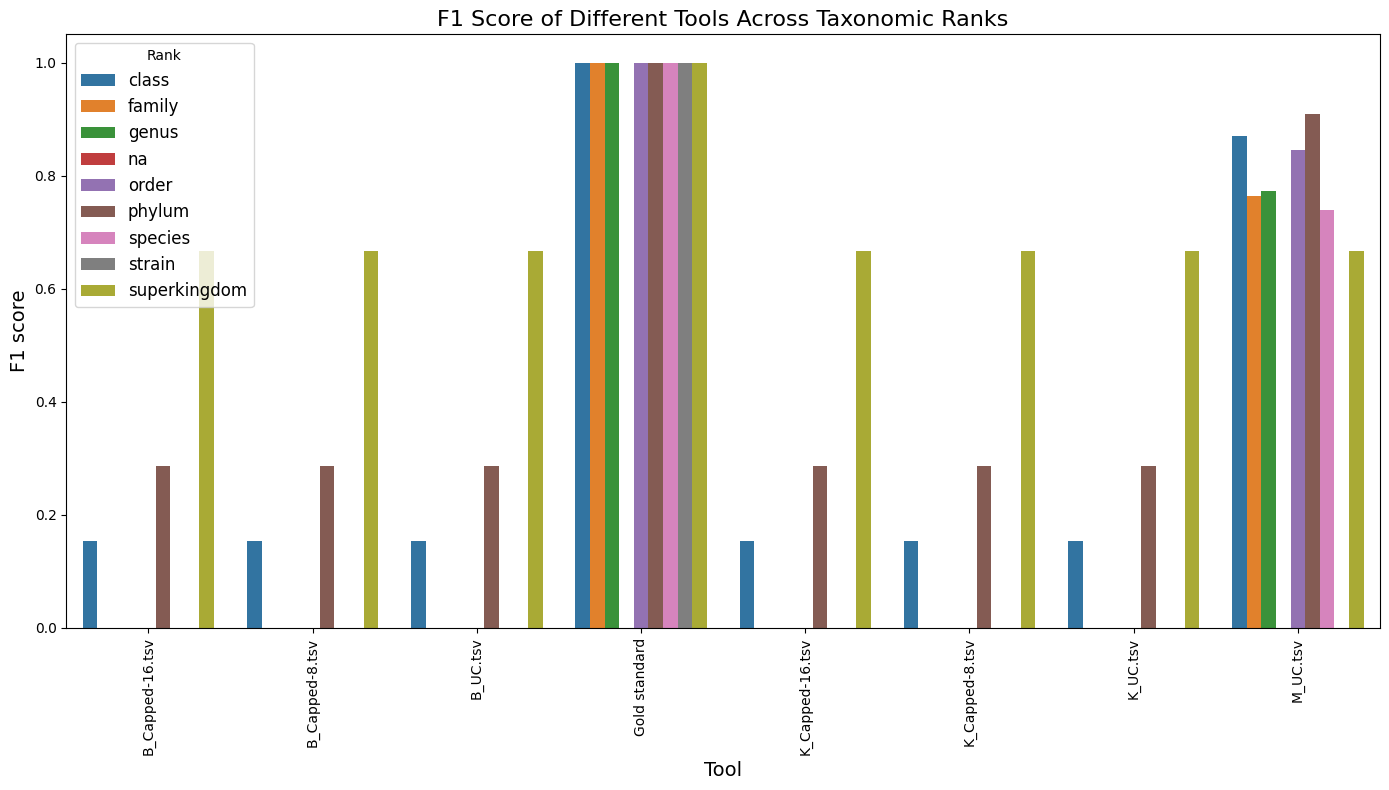

In [15]:
# Plotting Completeness, Purity, and F1 Score
plot_enhanced_bar(data_pivot, 'Completeness', 'Completeness of Different Tools Across Taxonomic Ranks')
plot_enhanced_bar(data_pivot, 'Purity', 'Purity of Different Tools Across Taxonomic Ranks')
plot_enhanced_bar(data_pivot, 'F1 score', 'F1 Score of Different Tools Across Taxonomic Ranks')


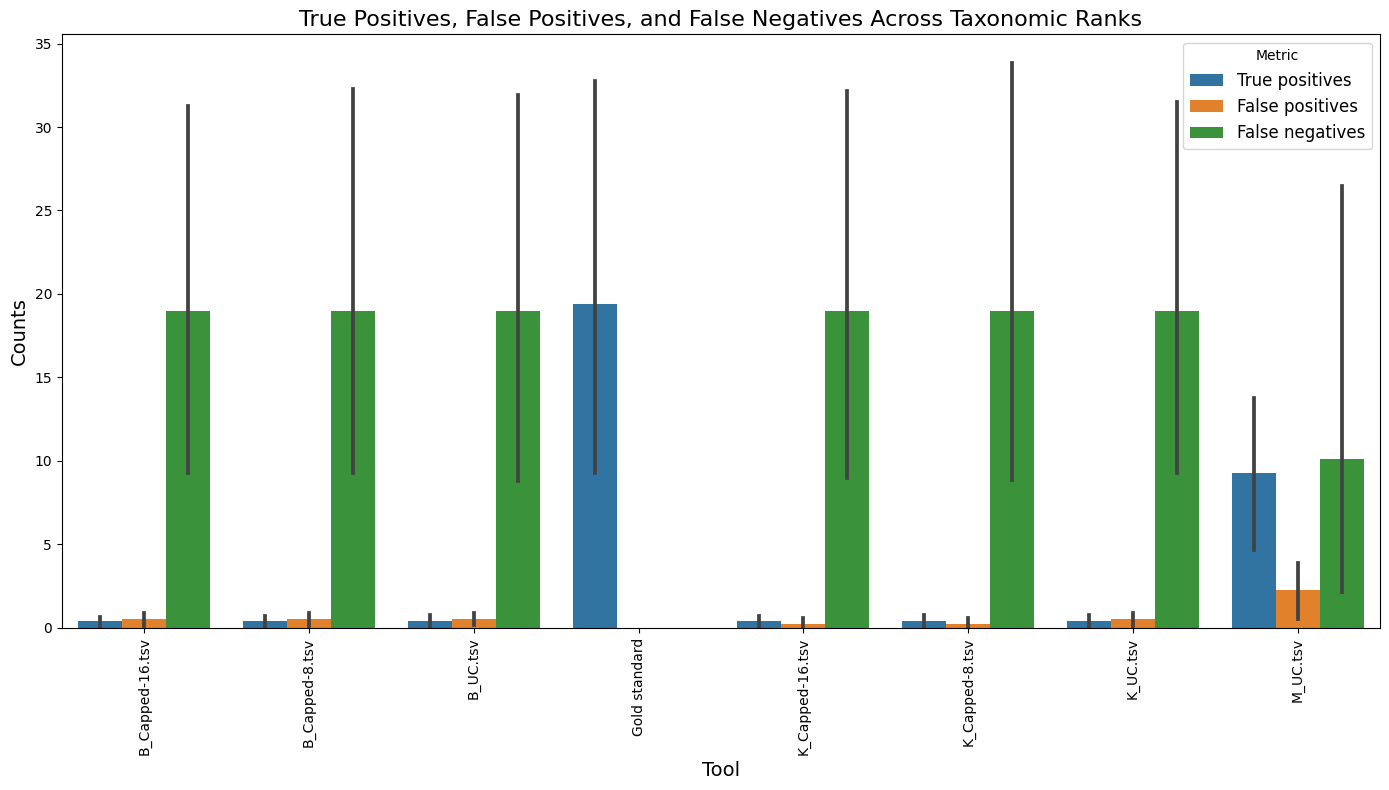

In [16]:
# Plotting stacked bars for True Positives, False Positives, and False Negatives
plot_enhanced_stacked_bars(data_pivot, ['True positives', 'False positives', 'False negatives'], 'True Positives, False Positives, and False Negatives Across Taxonomic Ranks')

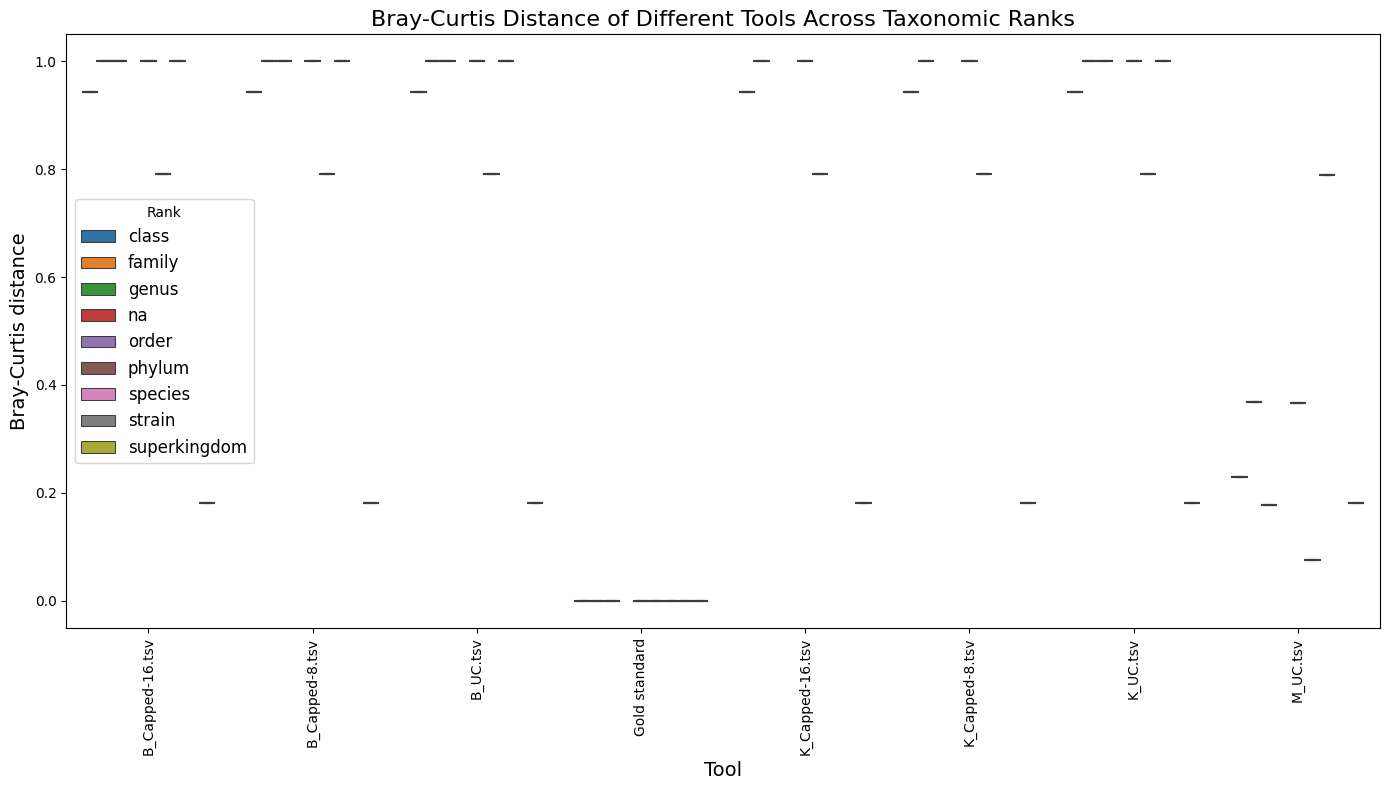

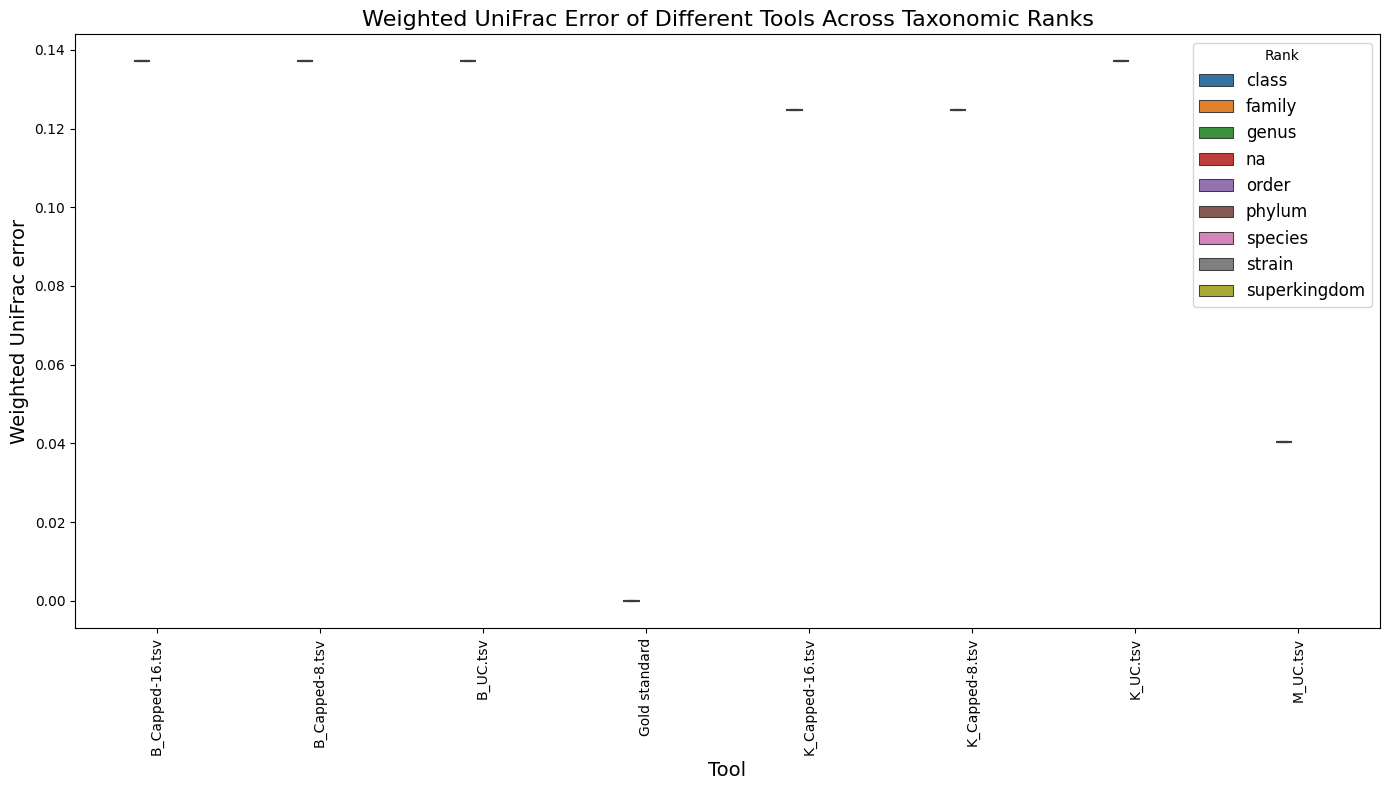

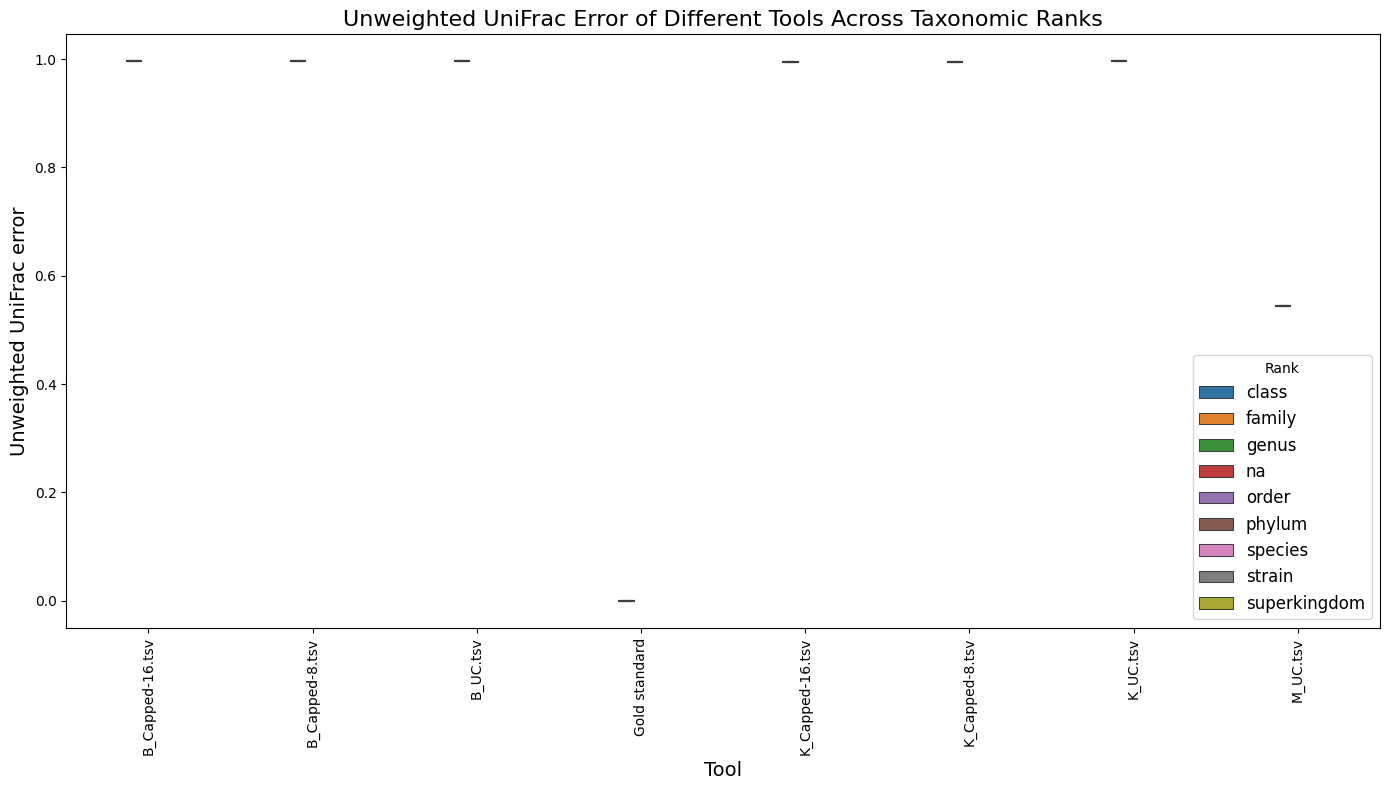

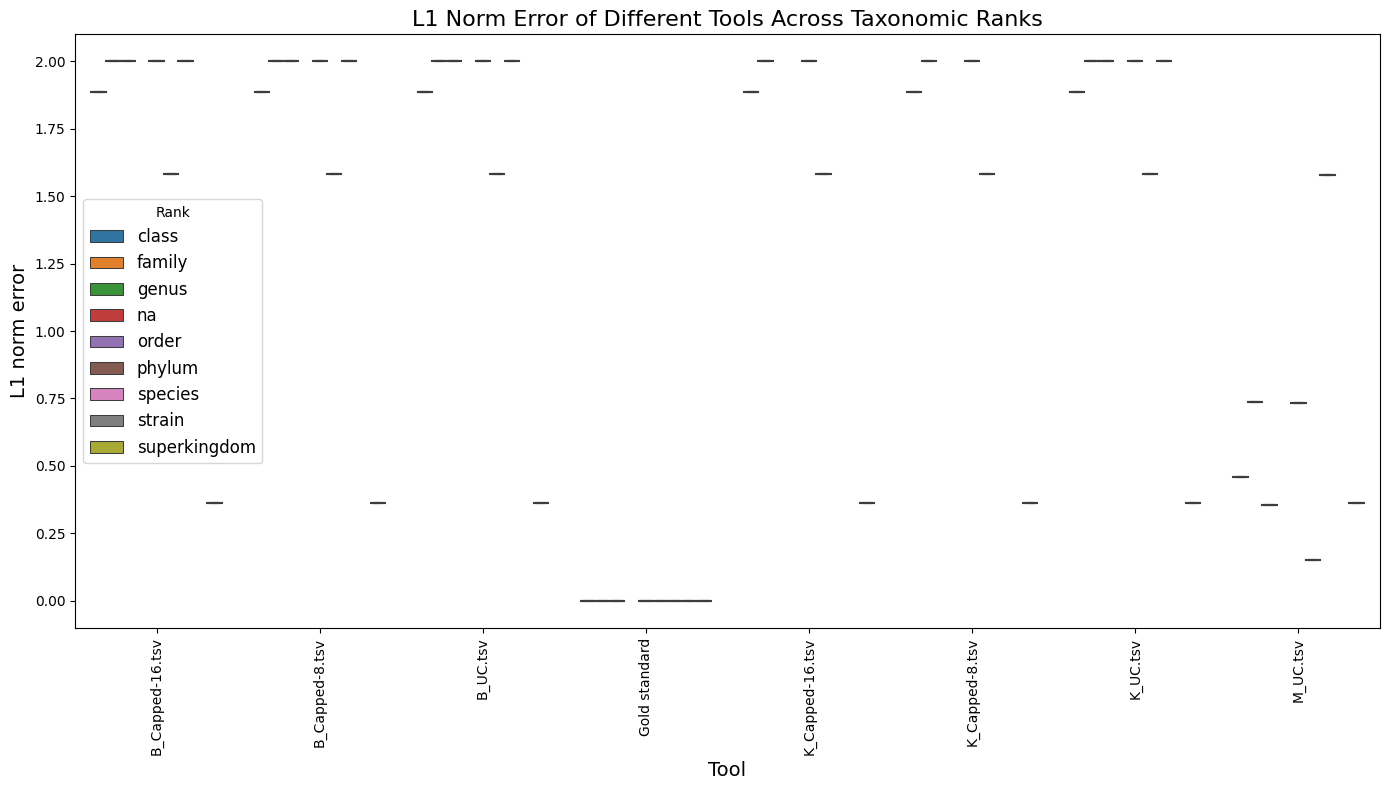

In [17]:
# Plotting box plots for Bray-Curtis Distance, Weighted UniFrac Error, Unweighted UniFrac Error, L1 Norm Error
plot_enhanced_box(data_pivot, 'Bray-Curtis distance', 'Bray-Curtis Distance of Different Tools Across Taxonomic Ranks')
plot_enhanced_box(data_pivot, 'Weighted UniFrac error', 'Weighted UniFrac Error of Different Tools Across Taxonomic Ranks')
plot_enhanced_box(data_pivot, 'Unweighted UniFrac error', 'Unweighted UniFrac Error of Different Tools Across Taxonomic Ranks')
plot_enhanced_box(data_pivot, 'L1 norm error', 'L1 Norm Error of Different Tools Across Taxonomic Ranks')


In [ ]:
# Plotting line plots for Shannon Diversity and Shannon Equitability
plot_enhanced_line(data_pivot, 'Shannon diversity', 'Shannon Diversity Across Taxonomic Ranks')
plot_enhanced_line(data_pivot, 'Shannon equitability', 'Shannon Equitability Across Taxonomic Ranks')

In [ ]:
# Additional plots if needed
# Plotting Sum of abundances and Taxon counts
plot_enhanced_bar(data_pivot, 'Sum of abundances', 'Sum of Abundances of Different Tools Across Taxonomic Ranks')
plot_enhanced_bar(data_pivot, 'Taxon counts', 'Taxon Counts of Different Tools Across Taxonomic Ranks')